<a href="https://colab.research.google.com/github/saciva-team-2b/Saciva-University-Recommendation-System-2B/blob/main/Saciva_University_Recommendation_System_2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Saciva University Recommendation System 2B**



---


**Resources and Documents:**  
[Trello Board](https://trello.com/b/nXdTl8OF/saciva-university-recommendation-system-2b) | [Google Drive](https://drive.google.com/drive/folders/1Psq7fGf3CNVNYAeFybnAVz_SMj8Py3TY) | [Github Repo](https://github.com/saciva-team-2b/Saciva-University-Recommendation-System-2B)

---

### **Challenge Summary**
Suggest top 5 Higher Education universities to a student by matching student's with the universities' profile. Student Profile: Current Education level, Field of study, Chosen research, entrepreneurship, and financial status. University Profile: location (climate, cost of living), the field, overall ranking, fees and tuition, other factors.

### **Context / Impact**
Saciva is an app for Students, especially international students to help through their higher education journey and choosing a university is the first step and often research on academics and tuition and over look factors such as climate, opportunities after in their field, cost of living, safety, etc. before they take admission.

### **Suggested Approach**
The student's profile can be vectorized to find the nearest data (unsupervised learning) to suggest the 5 most suitable universities to the student.

# **Data Exploration and Analysis**



First, we shall import the datasets. This includes:  
1. Times Data (2023)
2. CWUR Data (2019)
3. Shanghai Data (2019)
4. College Scorecard Institution-level data (2024)
5. College Scorecard Field of study-level data (2024)
6. Cost of Living Index (2021)
7. Campus Crime (2021-2022)

> **Run the code block below after adding the Datasets into your own Google Drive to utilize this notebook properly.**  
> Note: You might also want to put the "datasets" folder at the root of your Google Drive.

[CLICK HERE TO GO TO THE EXAMPLE FILE STRUCTURE PHOTO](https://colab.research.google.com/drive/1KrxDDoN4nUbglrO18ClYedpAyVA4pNBi#scrollTo=OXzikiQU9Mwd&line=1&uniqifier=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# import warnings
# warnings.filterwarnings("ignore")

Load the CSV files

In [ ]:
timesData = pd.read_csv("/content/drive/MyDrive/datasets/TimesData2023.csv")
cwurData = pd.read_csv("/content/drive/MyDrive/datasets/CWURData2019.csv")
shanghaiData = pd.read_csv("/content/drive/MyDrive/datasets/ShanghaiData2019.csv")
institutionsData = pd.read_csv("/content/drive/MyDrive/datasets/MostRecentCohortsInstitution2024.csv", low_memory=False)
fieldOfStudyData = pd.read_csv("/content/drive/MyDrive/datasets/MostRecentCohortsFieldofStudy2024.csv")
costOfLivingData = pd.read_csv("/content/drive/MyDrive/datasets/CostOfLivingIndex2021.csv")
campusCrimeData = pd.read_excel("/content/drive/MyDrive/datasets/CampusCrime20212022.xlsx")

## **Generate DataFrames from all the CSV files**

In [ ]:
timesDataDF = pd.DataFrame(timesData)
# cwurDataDF = pd.DataFrame(cwurData)
# shanghaiDataDF = pd.DataFrame(shanghaiData)
institutionsDataDF = pd.DataFrame(institutionsData)
fieldOfStudyDataDF = pd.DataFrame(fieldOfStudyData)
costOfLivingDataDF = pd.DataFrame(costOfLivingData)
campusCrimeDataDF = pd.DataFrame(campusCrimeData)
dfDictionary = {"timesDF": timesDataDF, "institutionsDF": institutionsDataDF, "fieldOfStudyDF": fieldOfStudyDataDF, "costOfLivingDF": costOfLivingDataDF, "campusCrimeDF": campusCrimeDataDF}

## **Keeping, Dropping, and Renaming Columns**

### Times Data (2023)

In [ ]:
dfDictionary["timesDF"].columns.to_list()

['University Rank',
 'Name of University',
 'Location',
 'No of student',
 'No of student per staff',
 'International Student',
 'Female:Male Ratio',
 'OverAll Score',
 'Teaching Score',
 'Research Score',
 'Citations Score',
 'Industry Income Score',
 'International Outlook Score']

In [ ]:
keptTimesDataColumns = ["University Rank", "Name of University", "Location", "No of student", "No of student per staff", "International Student", "Female:Male Ratio", "OverAll Score", "Teaching Score", "Research Score", "Citations Score", "Industry Income Score", "International Outlook Score"]
renamedTimesDataColumns = {
	"University Rank": "institute_rank", "Name of University": "institute_name", "Location": "country", "No of student": "population", "No of student per staff": "students_per_staff", "International Student": "international_percentage", "Female:Male Ratio": "fem_to_male_ratio", "OverAll Score": "overall_score", "Teaching Score": "teaching_score", "Research Score": "research_score", "Citations Score": "citations_score", "Industry Income Score": "industry_income_score", "International Outlook Score": "international_outlook_score"}

In [ ]:
try:
  dfDictionary["timesDF"] = dfDictionary["timesDF"][keptTimesDataColumns].rename(columns=renamedTimesDataColumns)
except:
  print("already renamed")

In [ ]:
dfDictionary["timesDF"].head(5)

,institute_rank,institute_name,country,population,students_per_staff,international_percentage,fem_to_male_ratio,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


### College Scorecard Institution-level data (2024)

In [ ]:
keptInstitutionsDataColumns = ["INSTNM", "CITY", "ACCREDAGENCY", "HCM2", "MAIN", "PREDDEG", "HIGHDEG", "CONTROL", "ST_FIPS", "CCBASIC", "ADM_RATE", "SAT_AVG", "DISTANCEONLY", "CURROPER", "TUITIONFEE_OUT", "ICLEVEL", "BOOKSUPPLY", "ROOMBOARD_ON", "OTHEREXPENSE_ON", "ROOMBOARD_OFF", "OTHEREXPENSE_OFF", "ADMCON7", "STUFACR"]
renamedInstitutionsDataColumns = {
	"INSTNM": "institute_name", "CITY": "city", "ST_FIPS": "state_num", "ACCREDAGENCY": "accredited", "HCM2": "financially_monitored", "TUITIONFEE_OUT": "tuition", "CONTROL": "organization", "MAIN": "is_main_campus", "CURROPER": "is_active", "PREDDEG": "predominant_deg_awarded", "HIGHDEG": "highest_deg_awarded", "ADM_RATE": "admission_rate", "CCBASIC": "college_type", "CCSIZSET": "college_length_and_setting", "ICLEVEL": "length_of_institution", "SAT_AVG": "sat_average", "DISTANCEONLY": "virtual", "BOOKSUPPLY": "book_and_supply_cost", "ROOMBOARD_ON": "room_and_board_on_cost", "OTHEREXPENSE_ON": "other_on_cost", "ROOMBOARD_OFF": "room_and_board_off_cost", "OTHEREXPENSE_OFF": "other_off_cost", "ADMCON7": "test_requirement", "STUFACR": "student_to_faculty_ratio"
}

In [ ]:
try:
  dfDictionary["institutionsDF"] = dfDictionary["institutionsDF"][keptInstitutionsDataColumns].rename(columns=renamedInstitutionsDataColumns)
except:
  print("already renamed")

In [ ]:
dfDictionary["institutionsDF"].head(5)

,institute_name,city,accredited,financially_monitored,is_main_campus,predominant_deg_awarded,highest_deg_awarded,organization,state_num,college_type,...,is_active,tuition,length_of_institution,book_and_supply_cost,room_and_board_on_cost,other_on_cost,room_and_board_off_cost,other_off_cost,test_requirement,student_to_faculty_ratio
0,Alabama A & M University,Normal,Southern Association of Colleges and Schools C...,0,1,3,4,1,1,18.0,...,1,18634.0,1,1600.0,9520.0,3090.0,9520.0,3090.0,5.0,19.0
1,University of Alabama at Birmingham,Birmingham,Southern Association of Colleges and Schools C...,0,1,3,4,1,1,15.0,...,1,21216.0,1,1200.0,13120.0,5757.0,14330.0,6007.0,5.0,18.0
2,Amridge University,Montgomery,Southern Association of Colleges and Schools C...,0,1,3,4,2,1,20.0,...,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,12.0
3,University of Alabama in Huntsville,Huntsville,Southern Association of Colleges and Schools C...,0,1,3,4,1,1,15.0,...,1,24770.0,1,2416.0,11122.0,4462.0,11122.0,4462.0,5.0,17.0
4,Alabama State University,Montgomery,Southern Association of Colleges and Schools C...,0,1,3,4,1,1,17.0,...,1,19396.0,1,1600.0,6050.0,3392.0,7320.0,5130.0,5.0,14.0


### Cost of Living Index (2021)

In [ ]:
keptCostOfLivingColumns = ["City", "State", "Cost of Living Index"]
renamedCostOfLivingColumns = {
	"City": "city", "State": "state_num", "Cost of Living Index": "cost_index",
}

In [ ]:
try:
  dfDictionary["costOfLivingDF"] = dfDictionary["costOfLivingDF"][keptCostOfLivingColumns].rename(columns=renamedCostOfLivingColumns)
except:
  print("already renamed")

In [ ]:
dfDictionary["costOfLivingDF"].head(5)

,city,state_num,cost_index
0,Abilene,TX,89.1
1,Adrian,MI,90.5
2,Akron,OH,89.4
3,Alamogordo,NM,85.8
4,Albany,GA,87.3


### College Scorecard Field of study-level data (2024)

In [ ]:
columns_field = dfDictionary["fieldOfStudyDF"].columns.tolist()
# print(columns_field)
keptFieldOfStudyColumns = ["INSTNM", "CONTROL", "MAIN", "CIPDESC", "CREDLEV",	"IPEDSCOUNT1",	"IPEDSCOUNT2",	"EARN_MDN_HI_2YR",	"EARN_NE_MDN_3YR",	"EARN_MDN_1YR",	"EARN_MDN_4YR",	"DISTANCE",	"EARN_MDN_5YR"]
renamedFieldOfStudyColumns = {
    "INSTNM": "institute_name", "CONTROL": "organization", "MAIN": "is_main_campus", "CIPDESC": "field_of_study",
    "CREDLEV": "highest_deg_awarded", "IPEDSCOUNT1": "postsec_credentials_year1", "IPEDSCOUNT2": "postsec_credentials_year2",
    "EARN_MDN_HI_2YR": "med_income_year2", "EARN_NE_MDN_3YR": "med_income_year3", "EARN_MDN_1YR": "med_income_year1", "EARN_MDN_4YR": "med_income_year4", "EARN_MDN_5YR": "med_income_year5", "DISTANCE": "virtual_possibility"}


In [ ]:
try:
  dfDictionary["fieldOfStudyDF"] = dfDictionary["fieldOfStudyDF"][keptFieldOfStudyColumns].rename(columns=renamedFieldOfStudyColumns)
except:
  print("already renamed")

In [ ]:
#Handle Missing Data
dfDictionary["fieldOfStudyDF"].isnull().sum()
dfDictionary["fieldOfStudyDF"].replace('PS', pd.NA, inplace=True)
dfDictionary["fieldOfStudyDF"].isnull().sum()
dfDictionary["fieldOfStudyDF"].dropna(inplace=True)
dfDictionary["fieldOfStudyDF"].dropna(axis=1, inplace=True)

dfDictionary["fieldOfStudyDF"].head(5)

,institute_name,organization,is_main_campus,field_of_study,highest_deg_awarded,postsec_credentials_year1,postsec_credentials_year2,med_income_year2,med_income_year3,med_income_year1,med_income_year4,virtual_possibility,med_income_year5
16,Alabama A & M University,Public,1,"Computer and Information Sciences, General.",3,20.0,37.0,52107,65291,63900,68138,1,85218
24,Alabama A & M University,Public,1,Teacher Education and Professional Development...,5,13.0,2.0,43240,50627,56295,55049,1,69062
29,Alabama A & M University,Public,1,"Electrical, Electronics and Communications Eng...",3,33.0,20.0,61303,70691,72241,75489,1,90409
30,Alabama A & M University,Public,1,Mechanical Engineering.,3,41.0,41.0,52107,62771,71954,70527,1,82929
39,Alabama A & M University,Public,1,"Liberal Arts and Sciences, General Studies and...",3,32.0,13.0,24615,30613,28877,39750,1,46627


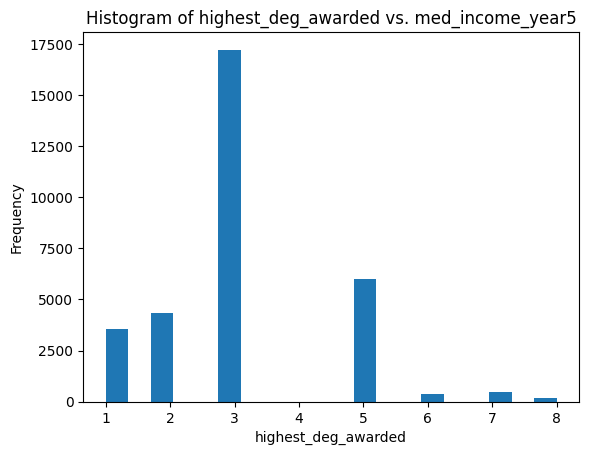

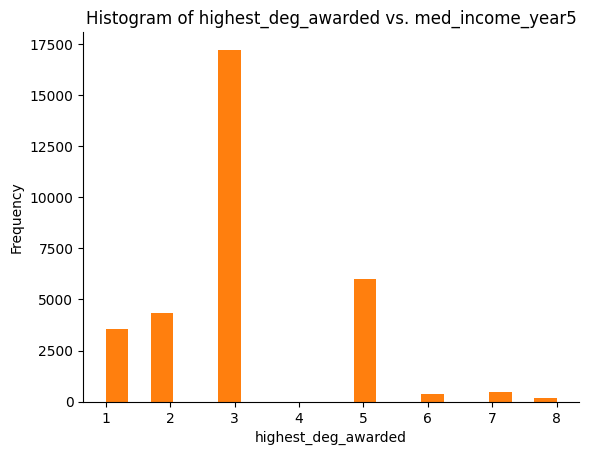

In [ ]:
# Convert EARN_MDN_5YR to numeric, handling potential errors
dfDictionary["fieldOfStudyDF"]['med_income_year5'] = pd.to_numeric(dfDictionary["fieldOfStudyDF"]['med_income_year5'], errors='coerce')

# Create the histogram
plt.hist(dfDictionary["fieldOfStudyDF"]['highest_deg_awarded'], bins=20)
plt.xlabel('highest_deg_awarded')
plt.ylabel('Frequency')
plt.title('Histogram of highest_deg_awarded vs. med_income_year5')
plt.show()

dfDictionary["fieldOfStudyDF"]['highest_deg_awarded'].plot(kind='hist', bins=20, title='highest_deg_awarded')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Convert EARN_MDN_5YR to numeric, handling potential errors
dfDictionary["fieldOfStudyDF"]['med_income_year5'] = pd.to_numeric(dfDictionary["fieldOfStudyDF"]['med_income_year5'], errors='coerce')

# Create the histogram
plt.hist(dfDictionary["fieldOfStudyDF"]['highest_deg_awarded'], bins=20)
plt.xlabel('highest_deg_awarded')
plt.ylabel('Frequency')
plt.title('Histogram of highest_deg_awarded vs. med_income_year5')
plt.show()



### Campus Crime (2021 - 2022)

In [ ]:
dfDictionary["campusCrimeDF"].head(5)

,INSTNM,BRANCH,Address,City,State,sector_cd,Sector_desc,men_total,women_total,Total,...,INCES22,STATR22,ROBBE22,AGG_A22,BURGLA22,VEHIC22,ARSON22,FILTER20,FILTER21,FILTER22
0,Alabama A & M University,Main Campus,4900 MERIDIAN ST,NORMAL,AL,1,"Public, 4-year or above",2369.0,3638.0,6007.0,...,0,0,0,0,14,0,0,1,1,1
1,University of Alabama at Birmingham,Main Campus,"ADMINISTRATION BLDG SUITE 1070, 701 20th Stree...",BIRMINGHAM,AL,1,"Public, 4-year or above",7903.0,13736.0,21639.0,...,0,0,0,9,15,21,2,1,1,1
2,University of Alabama at Birmingham,Huntsville Regional Medical Campus,301 Governors Drive SW,Huntsville,AL,1,"Public, 4-year or above",7903.0,13736.0,21639.0,...,0,0,0,0,0,0,0,1,1,1
3,University of Alabama in Huntsville,Main Campus,301 SPARKMAN DR,HUNTSVILLE,AL,1,"Public, 4-year or above",5333.0,3904.0,9237.0,...,0,0,0,0,3,2,0,1,1,1
4,Alabama State University,Main Campus,915 SOUTH JACKSON ST,MONTGOMERY,AL,1,"Public, 4-year or above",1347.0,2481.0,3828.0,...,0,0,0,4,9,0,0,1,1,1


In [ ]:
keptCampusCrimeColumns = ["INSTNM", "City", "State",
"MURD22", "NEG_M22", "RAPE22", "FONDL22", "INCES22", "STATR22", "ROBBE22", "AGG_A22", "BURGLA22", "VEHIC22", "ARSON22",
]
renamedCampusCrimeColumns = {
	"INSTNM": "institute_name", "State": "state_num", "City": "city",
	"MURD22": "murder", "NEG_M22": "negligent_manslaughter", "RAPE22": "rape", "FONDL22": "fondling", "INCES22": "incest", "STATR22": "statutory_rape", "ROBBE22": "robbery", "AGG_A22": "agg_assault", "BURGLA22": "burglary", "VEHIC22": "vehicle_theft", "ARSON22": "arson",
}

In [ ]:
try:
  dfDictionary["campusCrimeDF"] = dfDictionary["campusCrimeDF"][keptCampusCrimeColumns].rename(columns=renamedCampusCrimeColumns)
except:
  print("already renamed")

In [ ]:
dfDictionary["campusCrimeDF"].head(5)

,institute_name,city,state_num,murder,negligent_manslaughter,rape,fondling,incest,statutory_rape,robbery,agg_assault,burglary,vehicle_theft,arson
0,Alabama A & M University,NORMAL,AL,0,0,3,2,0,0,0,0,14,0,0
1,University of Alabama at Birmingham,BIRMINGHAM,AL,0,0,4,18,0,0,0,9,15,21,2
2,University of Alabama at Birmingham,Huntsville,AL,0,0,0,0,0,0,0,0,0,0,0
3,University of Alabama in Huntsville,HUNTSVILLE,AL,0,0,2,1,0,0,0,0,3,2,0
4,Alabama State University,MONTGOMERY,AL,0,0,1,0,0,0,0,4,9,0,0


Ensuring we have all the columns we need:

In [ ]:
for df in dfDictionary.keys():
  print(df)
  print(dfDictionary[df].columns.to_list())

timesDF
['institute_rank', 'institute_name', 'country', 'population', 'students_per_staff', 'international_percentage', 'fem_to_male_ratio', 'overall_score', 'teaching_score', 'research_score', 'citations_score', 'industry_income_score', 'international_outlook_score']
institutionsDF
['institute_name', 'city', 'accredited', 'financially_monitored', 'is_main_campus', 'predominant_deg_awarded', 'highest_deg_awarded', 'organization', 'state_num', 'college_type', 'admission_rate', 'sat_average', 'virtual', 'is_active', 'tuition', 'length_of_institution', 'book_and_supply_cost', 'room_and_board_on_cost', 'other_on_cost', 'room_and_board_off_cost', 'other_off_cost', 'test_requirement', 'student_to_faculty_ratio']
fieldOfStudyDF
['institute_name', 'organization', 'is_main_campus', 'field_of_study', 'highest_deg_awarded', 'postsec_credentials_year1', 'postsec_credentials_year2', 'med_income_year2', 'med_income_year3', 'med_income_year1', 'med_income_year4', 'virtual_possibility', 'med_income_ye

## **Combining the Data**

### Reconciling all the columns to have similar datatypes

#### Unify institute names

In [ ]:
for df_key in dfDictionary:
    df = dfDictionary[df_key]
    if "institute_name" in df.columns:
        df["institute_name"] = df["institute_name"].str.lower()
        df["institute_name"] = df["institute_name"].str.replace(" ", "_")
        df["institute_name"] = df["institute_name"].str.replace("__", "_")
        df["institute_name"] = df["institute_name"].str.replace("___", "_")
        df["institute_name"] = df["institute_name"].str.replace(".", "")
        df["institute_name"] = df["institute_name"].str.replace(",", "")
        df["institute_name"] = df["institute_name"].str.replace("(", "")
        df["institute_name"] = df["institute_name"].str.replace(")", "")
        df["institute_name"] = df["institute_name"].str.replace("-", "")
        df["institute_name"] = df["institute_name"].str.replace("&", "")
        df["institute_name"] = df["institute_name"].str.replace(":", "")
        df["institute_name"] = df["institute_name"].str.replace(";", "")
        df["institute_name"] = df["institute_name"].str.replace("/", "_")

for df_key in dfDictionary:
    df = dfDictionary[df_key]
    if "institute_name" in df.columns:
        df["institute_name"] = df["institute_name"].str.replace("__", "_")
        df["institute_name"] = df["institute_name"].str.replace("___", "_")

In [ ]:
dfDictionary["timesDF"].head()

,institute_rank,institute_name,country,population,students_per_staff,international_percentage,fem_to_male_ratio,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
0,1,university_of_oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,harvard_university,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,university_of_cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,stanford_university,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,massachusetts_institute_of_technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


In [ ]:
dfDictionary["institutionsDF"].head()

,institute_name,city,accredited,financially_monitored,is_main_campus,predominant_deg_awarded,highest_deg_awarded,organization,state_num,college_type,...,is_active,tuition,length_of_institution,book_and_supply_cost,room_and_board_on_cost,other_on_cost,room_and_board_off_cost,other_off_cost,test_requirement,student_to_faculty_ratio
0,alabama_a_m_university,Normal,Southern Association of Colleges and Schools C...,0,1,3,4,1,1,18.0,...,1,18634.0,1,1600.0,9520.0,3090.0,9520.0,3090.0,5.0,19.0
1,university_of_alabama_at_birmingham,Birmingham,Southern Association of Colleges and Schools C...,0,1,3,4,1,1,15.0,...,1,21216.0,1,1200.0,13120.0,5757.0,14330.0,6007.0,5.0,18.0
2,amridge_university,Montgomery,Southern Association of Colleges and Schools C...,0,1,3,4,2,1,20.0,...,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,12.0
3,university_of_alabama_in_huntsville,Huntsville,Southern Association of Colleges and Schools C...,0,1,3,4,1,1,15.0,...,1,24770.0,1,2416.0,11122.0,4462.0,11122.0,4462.0,5.0,17.0
4,alabama_state_university,Montgomery,Southern Association of Colleges and Schools C...,0,1,3,4,1,1,17.0,...,1,19396.0,1,1600.0,6050.0,3392.0,7320.0,5130.0,5.0,14.0


In [ ]:
dfDictionary["fieldOfStudyDF"].head()

,institute_name,organization,is_main_campus,field_of_study,highest_deg_awarded,postsec_credentials_year1,postsec_credentials_year2,med_income_year2,med_income_year3,med_income_year1,med_income_year4,virtual_possibility,med_income_year5
16,alabama_a_m_university,Public,1,"Computer and Information Sciences, General.",3,20.0,37.0,52107,65291,63900,68138,1,85218
24,alabama_a_m_university,Public,1,Teacher Education and Professional Development...,5,13.0,2.0,43240,50627,56295,55049,1,69062
29,alabama_a_m_university,Public,1,"Electrical, Electronics and Communications Eng...",3,33.0,20.0,61303,70691,72241,75489,1,90409
30,alabama_a_m_university,Public,1,Mechanical Engineering.,3,41.0,41.0,52107,62771,71954,70527,1,82929
39,alabama_a_m_university,Public,1,"Liberal Arts and Sciences, General Studies and...",3,32.0,13.0,24615,30613,28877,39750,1,46627


In [ ]:
dfDictionary["costOfLivingDF"].head()

,city,state_num,cost_index
0,Abilene,TX,89.1
1,Adrian,MI,90.5
2,Akron,OH,89.4
3,Alamogordo,NM,85.8
4,Albany,GA,87.3


In [ ]:
dfDictionary["campusCrimeDF"].head()

,institute_name,city,state_num,murder,negligent_manslaughter,rape,fondling,incest,statutory_rape,robbery,agg_assault,burglary,vehicle_theft,arson
0,alabama_a_m_university,NORMAL,AL,0,0,3,2,0,0,0,0,14,0,0
1,university_of_alabama_at_birmingham,BIRMINGHAM,AL,0,0,4,18,0,0,0,9,15,21,2
2,university_of_alabama_at_birmingham,Huntsville,AL,0,0,0,0,0,0,0,0,0,0,0
3,university_of_alabama_in_huntsville,HUNTSVILLE,AL,0,0,2,1,0,0,0,0,3,2,0
4,alabama_state_university,MONTGOMERY,AL,0,0,1,0,0,0,0,4,9,0,0


#### Unifying state_num

In [ ]:
# Viewing all the state_num values to convert
for eachDF in dfDictionary:
  for eachCol in dfDictionary[eachDF]:
    if dfDictionary[eachDF][eachCol].any() and eachCol == "state_num":
      print(eachDF + ":")
      print(dfDictionary[eachDF][eachCol].unique())

institutionsDF:
[ 1  2 53  4 35  5  6 27  8  9 36 10 11 12 13 15 16 17 18 26 19 20 29 21
 22 23 24 25 28 30 31 32 33 34 37 38 39 40 41 42 44 45 46 47 48 49 50 51
 54 55 56 60 66 69 72 64 70 78 68]
costOfLivingDF:
['TX' 'MI' 'OH' 'NM' 'GA' 'OR' 'NY' 'AL' 'LA' 'PA' 'IA' 'AK' 'WI' 'NC'
 'NJ' 'ME' 'CA' 'MD' 'MA' 'WV' 'WA' 'MT' 'ND' 'VA' 'IN' 'ID' 'CO' 'KY'
 'MN' 'MO' 'VT' 'IL' 'NV' 'WY' 'SC' 'TN' 'NH' 'DE' 'OK' 'AR' 'AZ' 'FL'
 'NE' 'MS' 'CT' 'HI' 'KS' 'UT' 'RI' 'SD' 'DC']
campusCrimeDF:
['AL' nan 'GA' 'FL' 'AK' 'WA' 'CA' 'MT' 'NM' 'AZ' 'DC' 'AR' 'OK' 'TN' 'NY'
 'OR' 'TX' 'MA' 'MN' 'CO' 'MD' 'CT' 'DE' 'NJ' 'VA' 'UT' 'PR' 'KY' 'SC'
 'NV' 'OH' 'NC' 'HI' 'ID' 'IL' 'WI' 'IN' 'MI' 'IA' 'MO' 'VI' 'KS' 'LA'
 'WV' 'MS' 'ME' 'NH' 'PA' 'WY' 'ND' 'NE' 'VT' 'SD' 'RI' 'AS' 'GU' 'MP'
 'FM' 'PW' 'MH']


In [ ]:
# Unifying all the state_nums
state_num_mapping = {
    'AL': 1, 'AK': 2, 'AZ': 4, 'AR': 5, 'CA': 6, 'CO': 8, 'CT': 9, 'DE': 10,
    'DC': 11, 'FL': 12, 'GA': 13, 'HI': 15, 'ID': 16, 'IL': 17, 'IN': 18, 'IA': 19,
    'KS': 20, 'KY': 21, 'LA': 22, 'ME': 23, 'MD': 24, 'MA': 25, 'MI': 26, 'MN': 27,
    'MS': 28, 'MO': 29, 'MT': 30, 'NE': 31, 'NV': 32, 'NH': 33, 'NJ': 34, 'NM': 35,
    'NY': 36, 'NC': 37, 'ND': 38, 'OH': 39, 'OK': 40, 'OR': 41, 'PA': 42, 'RI': 44,
    'SC': 45, 'SD': 46, 'TN': 47, 'TX': 48, 'UT': 49, 'VT': 50, 'VA': 51, 'WA': 53,
    'WV': 54, 'WI': 55, 'WY': 56, 'AS': 60, 'FM': 64, 'GU': 66, 'MP': 69, 'PW': 70,
    'PR': 72, 'VI': 78
}

# Map the state_num column in each dataset
for eachDF in dfDictionary:
  for eachCol in dfDictionary[eachDF]:
    if dfDictionary[eachDF][eachCol].any() and eachCol == "state_num" and eachDF != "institutionsDF":
      dfDictionary[eachDF][eachCol] = dfDictionary[eachDF][eachCol].map(state_num_mapping)
    if dfDictionary[eachDF][eachCol].any() and eachCol == "state_num":
      dfDictionary[eachDF][eachCol] = dfDictionary[eachDF][eachCol].astype(np.float64)


In [ ]:
for eachDF in dfDictionary:
  for eachCol in dfDictionary[eachDF]:
    if dfDictionary[eachDF][eachCol].any() and eachCol == "state_num":
      print(eachDF + ":")
      print(dfDictionary[eachDF][eachCol].unique())

institutionsDF:
[ 1.  2. 53.  4. 35.  5.  6. 27.  8.  9. 36. 10. 11. 12. 13. 15. 16. 17.
 18. 26. 19. 20. 29. 21. 22. 23. 24. 25. 28. 30. 31. 32. 33. 34. 37. 38.
 39. 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 54. 55. 56. 60. 66. 69.
 72. 64. 70. 78. 68.]
costOfLivingDF:
[48. 26. 39. 35. 13. 41. 36.  1. 22. 42. 19.  2. 55. 37. 34. 23.  6. 24.
 25. 54. 53. 30. 38. 51. 18. 16.  8. 21. 27. 29. 50. 17. 32. 56. 45. 47.
 33. 10. 40.  5.  4. 12. 31. 28.  9. 15. 20. 49. 44. 46. 11.]
campusCrimeDF:
[ 1. nan 13. 12.  2. 53.  6. 30. 35.  4. 11.  5. 40. 47. 36. 41. 48. 25.
 27.  8. 24.  9. 10. 34. 51. 49. 72. 21. 45. 32. 39. 37. 15. 16. 17. 55.
 18. 26. 19. 29. 78. 20. 22. 54. 28. 23. 33. 42. 56. 38. 31. 50. 46. 44.
 60. 66. 69. 64. 70.]


#### Unifying organization levels

In [ ]:
dfDictionary["fieldOfStudyDF"]["organization"] = dfDictionary["fieldOfStudyDF"]["organization"].str.lower()
dfDictionary["fieldOfStudyDF"]["organization"] = dfDictionary["fieldOfStudyDF"]["organization"].str.replace(" ", "_")
dfDictionary["fieldOfStudyDF"]["organization"] = dfDictionary["fieldOfStudyDF"]["organization"].str.replace(",", "")
dfDictionary["fieldOfStudyDF"]["organization"] = dfDictionary["fieldOfStudyDF"]["organization"].str.replace("-", "")

def convert_organization(org):
  if isinstance(org, str):
    org = org.lower()
    if org == 'public':
      return 1
    elif org == 'private_nonprofit':
      return 2
    elif org == 'private_forprofit':
      return 3
    else:
      return 0  # Or handle other cases as needed
  elif pd.isna(org):
      return 0
  else:
    return org

dfDictionary["fieldOfStudyDF"]["organization"] = dfDictionary["fieldOfStudyDF"]["organization"].apply(convert_organization)
dfDictionary["fieldOfStudyDF"]["organization"].unique()

array([1, 2, 3])

In [ ]:
dfDictionary["fieldOfStudyDF"].head()

,institute_name,organization,is_main_campus,field_of_study,highest_deg_awarded,postsec_credentials_year1,postsec_credentials_year2,med_income_year2,med_income_year3,med_income_year1,med_income_year4,virtual_possibility,med_income_year5
16,alabama_a_m_university,1,1,"Computer and Information Sciences, General.",3,20.0,37.0,52107,65291,63900,68138,1,85218
24,alabama_a_m_university,1,1,Teacher Education and Professional Development...,5,13.0,2.0,43240,50627,56295,55049,1,69062
29,alabama_a_m_university,1,1,"Electrical, Electronics and Communications Eng...",3,33.0,20.0,61303,70691,72241,75489,1,90409
30,alabama_a_m_university,1,1,Mechanical Engineering.,3,41.0,41.0,52107,62771,71954,70527,1,82929
39,alabama_a_m_university,1,1,"Liberal Arts and Sciences, General Studies and...",3,32.0,13.0,24615,30613,28877,39750,1,46627


In [ ]:
dfDictionary["fieldOfStudyDF"]["med_income_year1"] = dfDictionary["fieldOfStudyDF"]["med_income_year1"].astype("float64")
dfDictionary["fieldOfStudyDF"]["med_income_year2"] = dfDictionary["fieldOfStudyDF"]["med_income_year2"].astype("float64")
dfDictionary["fieldOfStudyDF"]["med_income_year3"] = dfDictionary["fieldOfStudyDF"]["med_income_year3"].astype("float64")
dfDictionary["fieldOfStudyDF"]["med_income_year4"] = dfDictionary["fieldOfStudyDF"]["med_income_year4"].astype("float64")

for column in dfDictionary["fieldOfStudyDF"].columns:
  if dfDictionary["fieldOfStudyDF"][column].dtype == "int64":
    dfDictionary["fieldOfStudyDF"][column] = dfDictionary["fieldOfStudyDF"][column].astype("float64")

dfDictionary["fieldOfStudyDF"].dtypes

,0
institute_name,object
organization,float64
is_main_campus,float64
field_of_study,object
highest_deg_awarded,float64
postsec_credentials_year1,float64
postsec_credentials_year2,float64
med_income_year2,float64
med_income_year3,float64
med_income_year1,float64


#### Converting values in timesDF to integers or floats

In [ ]:
if dfDictionary["timesDF"]["population"].dtype == "object":
  dfDictionary["timesDF"]["population"] = dfDictionary["timesDF"]["population"].str.replace(",", "")
if dfDictionary["timesDF"]["international_percentage"].dtype == "object":
  dfDictionary["timesDF"]["international_percentage"] = dfDictionary["timesDF"]["international_percentage"].str.replace("%", "")
if dfDictionary["timesDF"]["fem_to_male_ratio"].dtype == "object":
  dfDictionary["timesDF"]["fem_to_male_ratio"] = dfDictionary["timesDF"]["fem_to_male_ratio"].str.replace(":", "/")

dfDictionary["timesDF"]["population"] = pd.to_numeric(dfDictionary["timesDF"]["population"], errors='coerce')
dfDictionary["timesDF"]["international_percentage"] = pd.to_numeric(dfDictionary["timesDF"]["international_percentage"], errors='coerce')
if dfDictionary["timesDF"]["fem_to_male_ratio"].dtype == "object":
  dfDictionary["timesDF"]["fem_to_male_ratio"] = dfDictionary["timesDF"]["fem_to_male_ratio"].apply(
      lambda x: float(x.split('/')[0]) / float(x.split('/')[1]) if pd.notnull(x) and float(x.split('/')[1]) != 0 and isinstance(x, str) else x
  )
dfDictionary["timesDF"].head()

,institute_rank,institute_name,country,population,students_per_staff,international_percentage,fem_to_male_ratio,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
0,1,university_of_oxford,United Kingdom,20965.0,10.6,42.0,0.923077,96.4,92.3,99.7,99.0,74.9,96.2
1,2,harvard_university,United States,21887.0,9.6,25.0,1.0,95.2,94.8,99.0,99.3,49.5,80.5
2,3,university_of_cambridge,United Kingdom,20185.0,11.3,39.0,0.886792,94.8,90.9,99.5,97.0,54.2,95.8
3,3,stanford_university,United States,16164.0,7.1,24.0,0.851852,94.8,94.2,96.7,99.8,65.0,79.8
4,5,massachusetts_institute_of_technology,United States,11415.0,8.2,33.0,0.666667,94.2,90.7,93.6,99.8,90.9,89.3


In [ ]:
# Replace ranges like '201–250' with the highest value in the range.
def convert_rank(rank):
    if isinstance(rank, str) and '–' in rank:
        return int(rank.split('–')[1])
    try:
        return int(rank)
    except:
        return np.nan  # Handle cases where conversion to int fails

def convert_score(score):
    if isinstance(score, str) and '–' in score:
        return float(score.split('–')[1])
    elif isinstance(score, str) and '+' in score:
        return float(score.split('+')[0])
    try:
        return float(score)
    except:
        return np.nan  # Handle cases where conversion to float fails


dfDictionary["timesDF"]["institute_rank"] = dfDictionary["timesDF"]["institute_rank"].apply(convert_rank)
dfDictionary["timesDF"]["overall_score"] = dfDictionary["timesDF"]["overall_score"].apply(convert_score)

# Convert the column to numeric.
dfDictionary["timesDF"]["institute_rank"] = pd.to_numeric(dfDictionary["timesDF"]["institute_rank"], errors='coerce')
dfDictionary["timesDF"]["overall_score"] = pd.to_numeric(dfDictionary["timesDF"]["overall_score"], errors='coerce')

In [ ]:
# convert data to a float64
dfDictionary["timesDF"]["institute_rank"] = pd.to_numeric(dfDictionary["timesDF"]["institute_rank"], errors='coerce')
dfDictionary["timesDF"]["fem_to_male_ratio"] = pd.to_numeric(dfDictionary["timesDF"]["fem_to_male_ratio"], errors='coerce')
dfDictionary["timesDF"]["overall_score"] = pd.to_numeric(dfDictionary["timesDF"]["overall_score"], errors='coerce')

In [ ]:
dfDictionary["timesDF"].dtypes

,0
institute_rank,float64
institute_name,object
country,object
population,float64
students_per_staff,float64
international_percentage,float64
fem_to_male_ratio,float64
overall_score,float64
teaching_score,float64
research_score,float64


In [ ]:
dfDictionary["timesDF"].isnull().sum()

,0
institute_rank,897
institute_name,108
country,294
population,132
students_per_staff,133
international_percentage,135
fem_to_male_ratio,228
overall_score,542
teaching_score,542
research_score,542


#### Converting values in institutionsDF to integers or floats

In [ ]:
dfDictionary["institutionsDF"].head()

,institute_name,city,accredited,financially_monitored,is_main_campus,predominant_deg_awarded,highest_deg_awarded,organization,state_num,college_type,...,is_active,tuition,length_of_institution,book_and_supply_cost,room_and_board_on_cost,other_on_cost,room_and_board_off_cost,other_off_cost,test_requirement,student_to_faculty_ratio
0,alabama_a_m_university,Normal,Southern Association of Colleges and Schools C...,0,1,3,4,1,1.0,18.0,...,1,18634.0,1,1600.0,9520.0,3090.0,9520.0,3090.0,5.0,19.0
1,university_of_alabama_at_birmingham,Birmingham,Southern Association of Colleges and Schools C...,0,1,3,4,1,1.0,15.0,...,1,21216.0,1,1200.0,13120.0,5757.0,14330.0,6007.0,5.0,18.0
2,amridge_university,Montgomery,Southern Association of Colleges and Schools C...,0,1,3,4,2,1.0,20.0,...,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,12.0
3,university_of_alabama_in_huntsville,Huntsville,Southern Association of Colleges and Schools C...,0,1,3,4,1,1.0,15.0,...,1,24770.0,1,2416.0,11122.0,4462.0,11122.0,4462.0,5.0,17.0
4,alabama_state_university,Montgomery,Southern Association of Colleges and Schools C...,0,1,3,4,1,1.0,17.0,...,1,19396.0,1,1600.0,6050.0,3392.0,7320.0,5130.0,5.0,14.0


In [ ]:
# Replace NaN values in the 'accredited' column with 0 and non-NaN values with 1
dfDictionary["institutionsDF"]["accredited"] = dfDictionary["institutionsDF"]["accredited"].notna().astype(int)

dfDictionary["institutionsDF"].head()

,institute_name,city,accredited,financially_monitored,is_main_campus,predominant_deg_awarded,highest_deg_awarded,organization,state_num,college_type,...,is_active,tuition,length_of_institution,book_and_supply_cost,room_and_board_on_cost,other_on_cost,room_and_board_off_cost,other_off_cost,test_requirement,student_to_faculty_ratio
0,alabama_a_m_university,Normal,1,0,1,3,4,1,1.0,18.0,...,1,18634.0,1,1600.0,9520.0,3090.0,9520.0,3090.0,5.0,19.0
1,university_of_alabama_at_birmingham,Birmingham,1,0,1,3,4,1,1.0,15.0,...,1,21216.0,1,1200.0,13120.0,5757.0,14330.0,6007.0,5.0,18.0
2,amridge_university,Montgomery,1,0,1,3,4,2,1.0,20.0,...,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,12.0
3,university_of_alabama_in_huntsville,Huntsville,1,0,1,3,4,1,1.0,15.0,...,1,24770.0,1,2416.0,11122.0,4462.0,11122.0,4462.0,5.0,17.0
4,alabama_state_university,Montgomery,1,0,1,3,4,1,1.0,17.0,...,1,19396.0,1,1600.0,6050.0,3392.0,7320.0,5130.0,5.0,14.0


In [ ]:
for column in dfDictionary["institutionsDF"].columns:
  if dfDictionary["institutionsDF"][column].dtype == "int64":
    dfDictionary["institutionsDF"][column] = dfDictionary["institutionsDF"][column].astype("float64")

dfDictionary["institutionsDF"].dtypes

,0
institute_name,object
city,object
accredited,float64
financially_monitored,float64
is_main_campus,float64
predominant_deg_awarded,float64
highest_deg_awarded,float64
organization,float64
state_num,float64
college_type,float64


#### Converting values in fieldOfStudyDF to integers or floats

In [ ]:
dfDictionary["fieldOfStudyDF"].dtypes

,0
institute_name,object
organization,float64
is_main_campus,float64
field_of_study,object
highest_deg_awarded,float64
postsec_credentials_year1,float64
postsec_credentials_year2,float64
med_income_year2,float64
med_income_year3,float64
med_income_year1,float64


#### Converting values in costOfLivingDF to integers or floats

In [ ]:
dfDictionary["costOfLivingDF"].dtypes

,0
city,object
state_num,float64
cost_index,float64


#### Converting values in campusCrimeDF to integers or floats

In [ ]:
for column in dfDictionary["campusCrimeDF"].columns:
  if dfDictionary["campusCrimeDF"][column].dtype == "int64":
    dfDictionary["campusCrimeDF"][column] = dfDictionary["campusCrimeDF"][column].astype("float64")

dfDictionary["campusCrimeDF"].dtypes

,0
institute_name,object
city,object
state_num,float64
murder,float64
negligent_manslaughter,float64
rape,float64
fondling,float64
incest,float64
statutory_rape,float64
robbery,float64


### **Performing the merge**

#### Take care of duplicates in campusCrimeDF

In [ ]:
def merge_duplicates(df):
    # Group by 'institute_name'
    grouped = df.groupby('institute_name')

    # Aggregate the data
    merged_df = grouped.agg({
        'state_num': 'first',  # Take the first state_num
        'city': 'first',
        'murder': 'sum',
        'negligent_manslaughter': 'sum',
        'rape': 'sum',
        'fondling': 'sum',
        'incest': 'sum',
        'statutory_rape': 'sum',
        'robbery': 'sum',
        'agg_assault': 'sum',
        'burglary': 'sum',
        'vehicle_theft': 'sum',
        'arson': 'sum'
    }).reset_index()

    return merged_df

# Apply the function to campusCrimeDF
campusCrimeDF = dfDictionary["campusCrimeDF"]
merged_campusCrimeDF = merge_duplicates(campusCrimeDF)

dfDictionary["campusCrimeDF"] = merged_campusCrimeDF
duplicates = dfDictionary["campusCrimeDF"][dfDictionary["campusCrimeDF"].duplicated(subset=['institute_name'], keep=False)]
duplicates # if success, this should not return any rows

,institute_name,state_num,city,murder,negligent_manslaughter,rape,fondling,incest,statutory_rape,robbery,agg_assault,burglary,vehicle_theft,arson


#### Take care of duplicates in institutionsDF

In [ ]:
def merge_institutions_max(df):
    # Group by 'institute_name'
    grouped = df.groupby('institute_name')

    # Aggregate using the maximum value for numeric columns
    merged_df = grouped.agg({
        col: 'max' if pd.api.types.is_numeric_dtype(df[col]) else 'first'
        for col in df.columns
        if col != 'institute_name'
    }).reset_index()
    return merged_df

# Apply the function to institutionsDF
institutionsDF = dfDictionary["institutionsDF"]
merged_institutionsDF = merge_institutions_max(institutionsDF)
dfDictionary["institutionsDF"] = merged_institutionsDF

duplicates = dfDictionary["institutionsDF"][dfDictionary["institutionsDF"].duplicated(subset=['institute_name'], keep=False)]
duplicates # if success, this should not return any rows

,institute_name,city,accredited,financially_monitored,is_main_campus,predominant_deg_awarded,highest_deg_awarded,organization,state_num,college_type,...,is_active,tuition,length_of_institution,book_and_supply_cost,room_and_board_on_cost,other_on_cost,room_and_board_off_cost,other_off_cost,test_requirement,student_to_faculty_ratio


#### Take care of duplicates in fieldOfStudyDF

In [ ]:
duplicates = dfDictionary["fieldOfStudyDF"][dfDictionary["fieldOfStudyDF"].duplicated(subset=['institute_name'], keep=False)]
duplicates["field_of_study"].unique()

array(['Computer and Information Sciences, General.',
       'Teacher Education and Professional Development, Specific Levels and Methods.',
       'Electrical, Electronics and Communications Engineering.',
       'Mechanical Engineering.',
       'Liberal Arts and Sciences, General Studies and Humanities.',
       'Biology, General.',
       'Clinical, Counseling and Applied Psychology.', 'Social Work.',
       'Communication Disorders Sciences and Services.',
       'Business Administration, Management and Operations.',
       'Communication and Media Studies.',
       'Educational Administration and Supervision.',
       'Special Education and Teaching.',
       'Student Counseling and Personnel Services.',
       'Teacher Education and Professional Development, Specific Subject Areas.',
       'Teaching English or French as a Second or Foreign Language.',
       'Engineering, General.', 'Civil Engineering.',
       'Materials Engineering',
       'English Language and Literature, G

In [ ]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the 'field_of_study' column
enc.fit(dfDictionary["fieldOfStudyDF"][["field_of_study"]])

# Transform the 'field_of_study' column into one-hot encoded features
encoded_fields = enc.transform(dfDictionary["fieldOfStudyDF"][["field_of_study"]])

# Create a new DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_fields, columns=enc.get_feature_names_out(["field_of_study"]))

# Concatenate the encoded features with the original DataFrame
dfDictionary["fieldOfStudyDF"] = pd.concat([dfDictionary["fieldOfStudyDF"], encoded_df], axis=1)


def merge_institutions_max(df):
    # Group by 'institute_name'
    grouped = df.groupby('institute_name')

    # Aggregate using the maximum value for numeric columns and sum for one-hot encoded columns.
    merged_df = grouped.agg({
        col: 'max' if pd.api.types.is_numeric_dtype(df[col]) else ('sum' if col.startswith('field_of_study_') else 'first')
        for col in df.columns
        if col != 'institute_name'
    }).reset_index()
    return merged_df

# Apply the improved function to fieldOfStudyDF
fieldOfStudyDF = dfDictionary["fieldOfStudyDF"]
merged_fieldOfStudyDF = merge_institutions_max(fieldOfStudyDF)
dfDictionary["fieldOfStudyDF"] = merged_fieldOfStudyDF

# Check for duplicates again
duplicates = dfDictionary["fieldOfStudyDF"][dfDictionary["fieldOfStudyDF"].duplicated(subset=['institute_name'], keep=False)]
duplicates # if success, this should not return any rows

,institute_name,organization,is_main_campus,field_of_study,highest_deg_awarded,postsec_credentials_year1,postsec_credentials_year2,med_income_year2,med_income_year3,med_income_year1,...,field_of_study_Textile Sciences and Engineering.,field_of_study_Theological and Ministerial Studies.,"field_of_study_Theology and Religious Vocations, Other.",field_of_study_Urban Studies/Affairs.,field_of_study_Vehicle Maintenance and Repair Technologies.,"field_of_study_Visual and Performing Arts, General.","field_of_study_Visual and Performing Arts, Other.",field_of_study_Wildlife and Wildlands Science and Management.,field_of_study_Woodworking.,field_of_study_Zoology/Animal Biology.


In [ ]:
# Rename columns
new_columns = {}
for col in dfDictionary["fieldOfStudyDF"].columns:
    new_col = col.lower().replace(" ", "_").replace(".", "").replace("/", "_").replace(",", "")
    new_columns[col] = new_col
dfDictionary["fieldOfStudyDF"] = dfDictionary["fieldOfStudyDF"].rename(columns=new_columns)

# replace NaN columns with 0
dfDictionary["fieldOfStudyDF"].fillna(0, inplace=True)

In [ ]:
dfDictionary["fieldOfStudyDF"].head()

,institute_name,organization,is_main_campus,field_of_study,highest_deg_awarded,postsec_credentials_year1,postsec_credentials_year2,med_income_year2,med_income_year3,med_income_year1,...,field_of_study_textile_sciences_and_engineering,field_of_study_theological_and_ministerial_studies,field_of_study_theology_and_religious_vocations_other,field_of_study_urban_studies_affairs,field_of_study_vehicle_maintenance_and_repair_technologies,field_of_study_visual_and_performing_arts_general,field_of_study_visual_and_performing_arts_other,field_of_study_wildlife_and_wildlands_science_and_management,field_of_study_woodworking,field_of_study_zoology_animal_biology
0,a_t_still_university_of_health_sciences,2.0,1.0,"Educational Assessment, Evaluation, and Research.",7.0,180.0,181.0,107089.0,137118.0,142550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abc_beauty_academy,3.0,1.0,Cosmetology and Related Personal Grooming Serv...,1.0,52.0,132.0,16081.0,11550.0,19524.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abcott_institute,3.0,1.0,"Practical Nursing, Vocational Nursing and Nurs...",1.0,20.0,10.0,17773.0,18104.0,21658.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abilene_christian_university,2.0,1.0,Educational Administration and Supervision.,5.0,67.0,65.0,64068.0,76106.0,72481.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abraham_baldwin_agricultural_college,1.0,1.0,Applied Horticulture and Horticultural Busines...,3.0,209.0,174.0,56999.0,58466.0,66850.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Combine the dataframes

We must merge it one step at a time to ensure that NaN/Null values get resolved along the way and we do not merge willy-nilly

In [ ]:
# Combining the dataframes based on the names of the institutes
combined_df = dfDictionary["timesDF"].copy()
combined_df = combined_df[combined_df['country'] == 'United States']
print(combined_df.shape)
combined_df.head()


(173, 13)


,institute_rank,institute_name,country,population,students_per_staff,international_percentage,fem_to_male_ratio,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
1,2.0,harvard_university,United States,21887.0,9.6,25.0,1.000000,95.2,94.8,99.0,99.3,49.5,80.5
3,3.0,stanford_university,United States,16164.0,7.1,24.0,0.851852,94.8,94.2,96.7,99.8,65.0,79.8
4,5.0,massachusetts_institute_of_technology,United States,11415.0,8.2,33.0,0.666667,94.2,90.7,93.6,99.8,90.9,89.3
5,6.0,california_institute_of_technology,United States,2237.0,6.2,34.0,0.587302,94.1,90.9,97.0,97.3,89.8,83.6
6,7.0,princeton_university,United States,8279.0,8.0,23.0,0.851852,92.4,87.6,95.9,99.1,66.0,80.3


In [ ]:
# Start with timesDF filtering for U.S. universities
combined_df = dfDictionary["timesDF"].copy()
combined_df = combined_df[combined_df['country'] == 'United States']

# Merge with institutionsDF
institutionsDF = dfDictionary["institutionsDF"]
combined_df = pd.merge(combined_df, institutionsDF, on="institute_name", how="inner")

print("After merging institutionsDF:")
print(combined_df.isnull().sum())
combined_df.shape



After merging institutionsDF:
institute_rank                  2
institute_name                  0
country                         0
population                      0
students_per_staff              0
international_percentage        0
fem_to_male_ratio               4
overall_score                   2
teaching_score                  2
research_score                  2
citations_score                 2
industry_income_score           2
international_outlook_score     2
city                            0
accredited                      0
financially_monitored           0
is_main_campus                  0
predominant_deg_awarded         0
highest_deg_awarded             0
organization                    0
state_num                       0
college_type                    0
admission_rate                  4
sat_average                    15
virtual                         0
is_active                       0
tuition                         3
length_of_institution           0
book_and_supply_co

(127, 35)

In [ ]:
# Fill numeric columns with mean where appropriate
numeric_fill_mean = ['institute_rank', 'overall_score', 'teaching_score', 'research_score', 'citations_score', 'fem_to_male_ratio', 'industry_income_score', 'international_outlook_score', 'admission_rate', 'sat_average', 'tuition', 'student_to_faculty_ratio']
for col in numeric_fill_mean:
    combined_df[col] = combined_df[col].fillna(combined_df[col].mean())

# Fill numeric columns with 0 where missing values means absence or no cost
numeric_fill_zero = ['room_and_board_off_cost', 'other_on_cost', 'book_and_supply_cost',
                     'room_and_board_on_cost', 'other_off_cost']
for col in numeric_fill_zero:
    combined_df[col] = combined_df[col].fillna(0)

# Fill categorical columns with "Unknown", ensuring type compatibility
categorical_fill_unknown = ['college_type', 'test_requirement', 'virtual']
for col in categorical_fill_unknown:
    combined_df[col] = combined_df[col].astype(str).fillna("Unknown")

# Check for remaining null values
print("Remaining null values after filling:")
print(combined_df.isnull().sum())


Remaining null values after filling:
institute_rank                 0
institute_name                 0
country                        0
population                     0
students_per_staff             0
international_percentage       0
fem_to_male_ratio              0
overall_score                  0
teaching_score                 0
research_score                 0
citations_score                0
industry_income_score          0
international_outlook_score    0
city                           0
accredited                     0
financially_monitored          0
is_main_campus                 0
predominant_deg_awarded        0
highest_deg_awarded            0
organization                   0
state_num                      0
college_type                   0
admission_rate                 0
sat_average                    0
virtual                        0
is_active                      0
tuition                        0
length_of_institution          0
book_and_supply_cost           0
room_a

In [ ]:
print("\nFinal combined_df columns:", combined_df.columns)


Final combined_df columns: Index(['institute_rank', 'institute_name', 'country', 'population',
       'students_per_staff', 'international_percentage', 'fem_to_male_ratio',
       'overall_score', 'teaching_score', 'research_score', 'citations_score',
       'industry_income_score', 'international_outlook_score', 'city',
       'accredited', 'financially_monitored', 'is_main_campus',
       'predominant_deg_awarded', 'highest_deg_awarded', 'organization',
       'state_num', 'college_type', 'admission_rate', 'sat_average', 'virtual',
       'is_active', 'tuition', 'length_of_institution', 'book_and_supply_cost',
       'room_and_board_on_cost', 'other_on_cost', 'room_and_board_off_cost',
       'other_off_cost', 'test_requirement', 'student_to_faculty_ratio'],
      dtype='object')


In [ ]:
# unique cols in fieldofstudy
existing_columns = set(combined_df.columns)
unique_columns_fieldOfStudy = [col for col in dfDictionary["fieldOfStudyDF"].columns if col not in existing_columns]

# `institute_name` for merging
unique_columns_fieldOfStudy.insert(0, 'institute_name')

# reduce `fieldOfStudyDF` with only the unique columns
fieldOfStudyDF_reduced = dfDictionary["fieldOfStudyDF"][unique_columns_fieldOfStudy]

# merge the reduced `fieldOfStudyDF` with `combined_df`
combined_df = pd.merge(
    combined_df,
    fieldOfStudyDF_reduced,
    on="institute_name",
    how="inner"
)
print("After merging `fieldOfStudyDF` with `combined_df`:")
print("Shape of combined_df:", combined_df.shape)
print("Columns in combined_df after final merge:\n", combined_df.columns)
print("Remaining NaN values by column after merging:\n")
for column in combined_df.isnull().sum():
  if column != 0:
    print(column)
print("END OF NAN VALUES\n")
combined_df.head()


After merging `fieldOfStudyDF` with `combined_df`:
Shape of combined_df: (126, 355)
Columns in combined_df after final merge:
 Index(['institute_rank', 'institute_name', 'country', 'population',
       'students_per_staff', 'international_percentage', 'fem_to_male_ratio',
       'overall_score', 'teaching_score', 'research_score',
       ...
       'field_of_study_textile_sciences_and_engineering',
       'field_of_study_theological_and_ministerial_studies',
       'field_of_study_theology_and_religious_vocations_other',
       'field_of_study_urban_studies_affairs',
       'field_of_study_vehicle_maintenance_and_repair_technologies',
       'field_of_study_visual_and_performing_arts_general',
       'field_of_study_visual_and_performing_arts_other',
       'field_of_study_wildlife_and_wildlands_science_and_management',
       'field_of_study_woodworking', 'field_of_study_zoology_animal_biology'],
      dtype='object', length=355)
Remaining NaN values by column after merging:

END OF N

,institute_rank,institute_name,country,population,students_per_staff,international_percentage,fem_to_male_ratio,overall_score,teaching_score,research_score,...,field_of_study_textile_sciences_and_engineering,field_of_study_theological_and_ministerial_studies,field_of_study_theology_and_religious_vocations_other,field_of_study_urban_studies_affairs,field_of_study_vehicle_maintenance_and_repair_technologies,field_of_study_visual_and_performing_arts_general,field_of_study_visual_and_performing_arts_other,field_of_study_wildlife_and_wildlands_science_and_management,field_of_study_woodworking,field_of_study_zoology_animal_biology
0,2.0,harvard_university,United States,21887.0,9.6,25.0,1.000000,95.2,94.8,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,stanford_university,United States,16164.0,7.1,24.0,0.851852,94.8,94.2,96.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,massachusetts_institute_of_technology,United States,11415.0,8.2,33.0,0.666667,94.2,90.7,93.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,princeton_university,United States,8279.0,8.0,23.0,0.851852,92.4,87.6,95.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,yale_university,United States,13482.0,5.9,21.0,1.083333,91.4,92.6,92.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# unique cols in campusCrimeDF to avoid conflicts
existing_columns = set(combined_df.columns)
unique_columns_crime = [col for col in dfDictionary["campusCrimeDF"].columns if col not in existing_columns]
unique_columns_crime.insert(0, 'institute_name')  # Ensure `institute_name` is included

# create a reduced version of campusCrimeDF with only the unique columns
campusCrimeDF_reduced = dfDictionary["campusCrimeDF"][unique_columns_crime]

# ee merge with `combined_df`
combined_df = pd.merge(
    combined_df,
    campusCrimeDF_reduced,
    on="institute_name",
    how="inner"
)

print("After merging campusCrimeDF with combined_df:")
print("Shape of combined_df:", combined_df.shape)
print("NaN values by column after merging:\n")
for column in combined_df.isnull().sum():
  if column != 0:
    print(column)
print("END OF NAN VALUES\n")
combined_df.head()


After merging campusCrimeDF with combined_df:
Shape of combined_df: (126, 366)
NaN values by column after merging:

END OF NAN VALUES



,institute_rank,institute_name,country,population,students_per_staff,international_percentage,fem_to_male_ratio,overall_score,teaching_score,research_score,...,negligent_manslaughter,rape,fondling,incest,statutory_rape,robbery,agg_assault,burglary,vehicle_theft,arson
0,2.0,harvard_university,United States,21887.0,9.6,25.0,1.000000,95.2,94.8,99.0,...,0.0,15.0,20.0,0.0,0.0,0.0,3.0,37.0,70.0,0.0
1,3.0,stanford_university,United States,16164.0,7.1,24.0,0.851852,94.8,94.2,96.7,...,0.0,33.0,25.0,0.0,1.0,2.0,20.0,25.0,149.0,1.0
2,5.0,massachusetts_institute_of_technology,United States,11415.0,8.2,33.0,0.666667,94.2,90.7,93.6,...,0.0,12.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,7.0,princeton_university,United States,8279.0,8.0,23.0,0.851852,92.4,87.6,95.9,...,0.0,6.0,4.0,0.0,0.0,0.0,0.0,9.0,49.0,1.0
4,9.0,yale_university,United States,13482.0,5.9,21.0,1.083333,91.4,92.6,92.7,...,0.0,40.0,9.0,0.0,1.0,1.0,8.0,11.0,18.0,1.0


In [ ]:
# aggregate costOfLivingDF by state_num, calculating the median cost index for each state
# dropping the 'city' column to avoid conflicts and ensure only one row per state
costOfLivingDF_agg = dfDictionary["costOfLivingDF"].drop(columns=["city"]).groupby("state_num", as_index=False).agg({"cost_index": "median"})

# merge the aggregated cost of living data with combined_df by state_num
combined_df = pd.merge(
    combined_df,
    costOfLivingDF_agg,
    on="state_num",
    how="inner"
)

print("After merging aggregated costOfLivingDF with combined_df:")
print("Shape of combined_df:", combined_df.shape)
print("NaN values by column after merging:\n")
for column in combined_df.isnull().sum():
  if column != 0:
    print(column)
print("END OF NAN VALUES\n")
combined_df.head()


After merging aggregated costOfLivingDF with combined_df:
Shape of combined_df: (126, 367)
NaN values by column after merging:

END OF NAN VALUES



,institute_rank,institute_name,country,population,students_per_staff,international_percentage,fem_to_male_ratio,overall_score,teaching_score,research_score,...,rape,fondling,incest,statutory_rape,robbery,agg_assault,burglary,vehicle_theft,arson,cost_index
0,2.0,harvard_university,United States,21887.0,9.6,25.0,1.000000,95.2,94.8,99.0,...,15.0,20.0,0.0,0.0,0.0,3.0,37.0,70.0,0.0,109.85
1,3.0,stanford_university,United States,16164.0,7.1,24.0,0.851852,94.8,94.2,96.7,...,33.0,25.0,0.0,1.0,2.0,20.0,25.0,149.0,1.0,118.40
2,5.0,massachusetts_institute_of_technology,United States,11415.0,8.2,33.0,0.666667,94.2,90.7,93.6,...,12.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,109.85
3,7.0,princeton_university,United States,8279.0,8.0,23.0,0.851852,92.4,87.6,95.9,...,6.0,4.0,0.0,0.0,0.0,0.0,9.0,49.0,1.0,103.15
4,9.0,yale_university,United States,13482.0,5.9,21.0,1.083333,91.4,92.6,92.7,...,40.0,9.0,0.0,1.0,1.0,8.0,11.0,18.0,1.0,105.90


In [ ]:
print(combined_df.shape)
combined_df.head()
combined_df.columns.tolist()

(126, 367)


['institute_rank',
 'institute_name',
 'country',
 'population',
 'students_per_staff',
 'international_percentage',
 'fem_to_male_ratio',
 'overall_score',
 'teaching_score',
 'research_score',
 'citations_score',
 'industry_income_score',
 'international_outlook_score',
 'city',
 'accredited',
 'financially_monitored',
 'is_main_campus',
 'predominant_deg_awarded',
 'highest_deg_awarded',
 'organization',
 'state_num',
 'college_type',
 'admission_rate',
 'sat_average',
 'virtual',
 'is_active',
 'tuition',
 'length_of_institution',
 'book_and_supply_cost',
 'room_and_board_on_cost',
 'other_on_cost',
 'room_and_board_off_cost',
 'other_off_cost',
 'test_requirement',
 'student_to_faculty_ratio',
 'field_of_study',
 'postsec_credentials_year1',
 'postsec_credentials_year2',
 'med_income_year2',
 'med_income_year3',
 'med_income_year1',
 'med_income_year4',
 'virtual_possibility',
 'med_income_year5',
 'field_of_study_accounting_and_related_services',
 'field_of_study_advanced_graduat

In [ ]:
# convert the cost index to a value
def costConvert(x):
  return x * 80000 / 100

combined_df['cost_index'] = combined_df['cost_index'].apply(costConvert)
combined_df['cost_index']

,cost_index
0,87880.0
1,94720.0
2,87880.0
3,82520.0
4,84720.0
...,...
121,72400.0
122,71800.0
123,71200.0
124,70640.0


### **Reducing Columns for Modeling**

In [ ]:
combined_df.columns[-13:]

Index(['field_of_study_zoology_animal_biology', 'murder',
       'negligent_manslaughter', 'rape', 'fondling', 'incest',
       'statutory_rape', 'robbery', 'agg_assault', 'burglary', 'vehicle_theft',
       'arson', 'cost_index'],
      dtype='object')

In [ ]:
# Calculate the sum of the last 11 columns (starting from the second to last)
combined_df['crimes'] = combined_df.iloc[:, -11:-1].sum(axis=1)

In [ ]:
combined_df['crimes']

,crimes
0,145.0
1,256.0
2,19.0
3,69.0
4,89.0
...,...
121,29.0
122,130.0
123,31.0
124,0.0


In [ ]:
combined_df.columns.tolist()

['institute_rank',
 'institute_name',
 'country',
 'population',
 'students_per_staff',
 'international_percentage',
 'fem_to_male_ratio',
 'overall_score',
 'teaching_score',
 'research_score',
 'citations_score',
 'industry_income_score',
 'international_outlook_score',
 'city',
 'accredited',
 'financially_monitored',
 'is_main_campus',
 'predominant_deg_awarded',
 'highest_deg_awarded',
 'organization',
 'state_num',
 'college_type',
 'admission_rate',
 'sat_average',
 'virtual',
 'is_active',
 'tuition',
 'length_of_institution',
 'book_and_supply_cost',
 'room_and_board_on_cost',
 'other_on_cost',
 'room_and_board_off_cost',
 'other_off_cost',
 'test_requirement',
 'student_to_faculty_ratio',
 'field_of_study',
 'postsec_credentials_year1',
 'postsec_credentials_year2',
 'med_income_year2',
 'med_income_year3',
 'med_income_year1',
 'med_income_year4',
 'virtual_possibility',
 'med_income_year5',
 'field_of_study_accounting_and_related_services',
 'field_of_study_advanced_graduat

In [ ]:
print(combined_df.info())  # Confirm you're working with the correct DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Columns: 368 entries, institute_rank to crimes
dtypes: float64(361), object(7)
memory usage: 362.4+ KB
None


In [ ]:
import pandas as pd

# Load combined_df (Replace this with your actual DataFrame)
# Assume combined_df contains all the columns you listed, including one-hot encoded ones

# Step 1: Define field-to-category mapping
field_mapping = {
    # STEM
    'field_of_study_aerospace_aeronautical_and_astronautical_engineering': 'STEM',
    'field_of_study_agricultural_engineering': 'STEM',
    'field_of_study_applied_mathematics': 'STEM',
    'field_of_study_architectural_engineering': 'STEM',
    'field_of_study_astronomy_and_astrophysics': 'STEM',
    'field_of_study_biochemical_engineering': 'STEM',
    'field_of_study_biology_general': 'STEM',
    'field_of_study_biomedical_medical_engineering': 'STEM',
    'field_of_study_biotechnology': 'STEM',
    'field_of_study_chemical_engineering': 'STEM',
    'field_of_study_civil_engineering': 'STEM',
    'field_of_study_computer_engineering': 'STEM',
    'field_of_study_computer_science': 'STEM',
    'field_of_study_electrical_electronics_and_communications_engineering': 'STEM',
    'field_of_study_engineering_general': 'STEM',
    'field_of_study_engineering_mechanics': 'STEM',
    'field_of_study_environmental_environmental_health_engineering': 'STEM',
    'field_of_study_genetics': 'STEM',
    'field_of_study_industrial_engineering': 'STEM',
    'field_of_study_information_science_studies': 'STEM',
    'field_of_study_mathematics': 'STEM',
    'field_of_study_mechanical_engineering': 'STEM',
    'field_of_study_physics': 'STEM',
    'field_of_study_statistics': 'STEM',

    # Education
    'field_of_study_curriculum_and_instruction': 'Education',
    'field_of_study_educational_administration_and_supervision': 'Education',
    'field_of_study_educational_assessment_evaluation_and_research': 'Education',
    'field_of_study_student_counseling_and_personnel_services': 'Education',
    'field_of_study_special_education_and_teaching': 'Education',
    'field_of_study_teacher_education_and_professional_development_specific_levels_and_methods': 'Education',
    'field_of_study_teacher_education_and_professional_development_specific_subject_areas': 'Education',
    'field_of_study_teaching_english_or_french_as_a_second_or_foreign_language': 'Education',

    # Business
    'field_of_study_accounting_and_related_services': 'Business',
    'field_of_study_business_administration_management_and_operations': 'Business',
    'field_of_study_business_commerce_general': 'Business',
    'field_of_study_business_managerial_economics': 'Business',
    'field_of_study_finance_and_financial_management_services': 'Business',
    'field_of_study_hospitality_administration_management': 'Business',
    'field_of_study_human_resources_management_and_services': 'Business',
    'field_of_study_international_business': 'Business',
    'field_of_study_management_information_systems_and_services': 'Business',
    'field_of_study_marketing': 'Business',
    'field_of_study_taxation': 'Business',

    # Arts and Humanities
    'field_of_study_design_and_applied_arts': 'Arts and Humanities',
    'field_of_study_drama_theatre_arts_and_stagecraft': 'Arts and Humanities',
    'field_of_study_film_video_and_photographic_arts': 'Arts and Humanities',
    'field_of_study_fine_and_studio_arts': 'Arts and Humanities',
    'field_of_study_history': 'Arts and Humanities',
    'field_of_study_linguistic_comparative_and_related_language_studies_and_services': 'Arts and Humanities',
    'field_of_study_music': 'Arts and Humanities',
    'field_of_study_philosophy': 'Arts and Humanities',
    'field_of_study_visual_and_performing_arts_general': 'Arts and Humanities',

    # Health
    'field_of_study_allied_health_diagnostic_intervention_and_treatment_professions': 'Health',
    'field_of_study_clinical_medical_laboratory_science_research_and_allied_professions': 'Health',
    'field_of_study_health_and_medical_administrative_services': 'Health',
    'field_of_study_health_professions_and_related_clinical_sciences_other': 'Health',
    'field_of_study_nutrition_sciences': 'Health',
    'field_of_study_pharmacy_pharmaceutical_sciences_and_administration': 'Health',
    'field_of_study_public_health': 'Health',
    'field_of_study_registered_nursing_nursing_administration_nursing_research_and_clinical_nursing': 'Health',
    'field_of_study_rehabilitation_and_therapeutic_professions': 'Health',

    # Social Sciences
    'field_of_study_anthropology': 'Social Sciences',
    'field_of_study_criminal_justice_and_corrections': 'Social Sciences',
    'field_of_study_economics': 'Social Sciences',
    'field_of_study_political_science_and_government': 'Social Sciences',
    'field_of_study_psychology_general': 'Social Sciences',
    'field_of_study_sociology': 'Social Sciences',
    'field_of_study_social_work': 'Social Sciences',
    'field_of_study_public_administration': 'Social Sciences',

    # Other
    'field_of_study_agriculture_general': 'STEM',
    'field_of_study_environmental_control_technologies_technicians': 'STEM',
    'field_of_study_forestry': 'STEM',
    'field_of_study_human_services_general': 'Social Sciences',
    'field_of_study_marine_sciences': 'STEM',
    'field_of_study_mining_and_mineral_engineering': 'STEM',
    'field_of_study_physical_sciences': 'STEM',
    'field_of_study_systems_engineering': 'STEM',
    'field_of_study_zoology_animal_biology': 'STEM'
}

# Step 2: Initialize new category columns in combined_df
categories = set(field_mapping.values())
for category in categories:
    combined_df[category] = 0

# Step 3: Aggregate one-hot encoded fields into their respective categories
for field, category in field_mapping.items():
    if field in combined_df.columns:
        combined_df[category] += combined_df[field]
    else:
        print(f"Warning: {field} not found in combined_df")

# Step 4: Drop the original one-hot encoded columns
field_columns = [col for col in combined_df.columns if col.startswith('field_of_study_')]
combined_df = combined_df.drop(columns=field_columns)

# Step 5: Select final 15 features for modeling
final_features = ['institute_name',
    'institute_rank', 'overall_score', 'teaching_score', 'research_score',
    'citations_score', 'industry_income_score', 'international_outlook_score',
    'tuition', 'student_to_faculty_ratio', 'admission_rate',
    'STEM', 'Education', 'Business', 'Health', 'cost_index', 'crimes'
]
final_df = combined_df[final_features]

# Step 6: Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df.select_dtypes(include=['float64', 'int64']))
final_df_scaled = pd.DataFrame(scaled_data, columns=final_df.select_dtypes(include=['float64', 'int64']).columns)

final_df.head()



,institute_name,institute_rank,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score,tuition,student_to_faculty_ratio,admission_rate,STEM,Education,Business,Health,cost_index,crimes
0,harvard_university,2.0,95.2,94.8,99.0,99.3,49.5,80.5,57261.0,7.0,0.0324,0.0,0.0,0.0,0.0,87880.0,145.0
1,stanford_university,3.0,94.8,94.2,96.7,99.8,65.0,79.8,58416.0,5.0,0.0368,0.0,0.0,0.0,0.0,94720.0,256.0
2,massachusetts_institute_of_technology,5.0,94.2,90.7,93.6,99.8,90.9,89.3,57986.0,3.0,0.0396,0.0,0.0,0.0,0.0,87880.0,19.0
3,princeton_university,7.0,92.4,87.6,95.9,99.1,66.0,80.3,57410.0,5.0,0.0570,0.0,0.0,0.0,0.0,82520.0,69.0
4,yale_university,9.0,91.4,92.6,92.7,97.0,55.0,70.9,62250.0,6.0,0.0457,0.0,0.0,0.0,0.0,84720.0,89.0


# **Exporting Final Dataframe to Excel File**





In [ ]:
final_df.head()

,institute_name,institute_rank,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score,tuition,student_to_faculty_ratio,admission_rate,STEM,Education,Business,Health,cost_index,crimes
0,harvard_university,2.0,95.2,94.8,99.0,99.3,49.5,80.5,57261.0,7.0,0.0324,0.0,0.0,0.0,0.0,87880.0,145.0
1,stanford_university,3.0,94.8,94.2,96.7,99.8,65.0,79.8,58416.0,5.0,0.0368,0.0,0.0,0.0,0.0,94720.0,256.0
2,massachusetts_institute_of_technology,5.0,94.2,90.7,93.6,99.8,90.9,89.3,57986.0,3.0,0.0396,0.0,0.0,0.0,0.0,87880.0,19.0
3,princeton_university,7.0,92.4,87.6,95.9,99.1,66.0,80.3,57410.0,5.0,0.0570,0.0,0.0,0.0,0.0,82520.0,69.0
4,yale_university,9.0,91.4,92.6,92.7,97.0,55.0,70.9,62250.0,6.0,0.0457,0.0,0.0,0.0,0.0,84720.0,89.0


In [ ]:
# Save combined DataFrame to CSV
final_df.to_csv('final_df.csv', index=False)

# Download the file
from google.colab import files
files.download('final_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Important Footnote**

Ensure that you download final_df.csv with the exact same name into a location on your computer. Then take this final_df.csv file and put it into a folder called `datasets/` to ensure that the modeling notebook linked [HERE](https://colab.research.google.com/drive/1DjHkv4A8lYxyZnI1ONazqLT142jDUhJ9) will be able to work with the exported dataset.

The final file structure should look something like this in the google account you're working through:
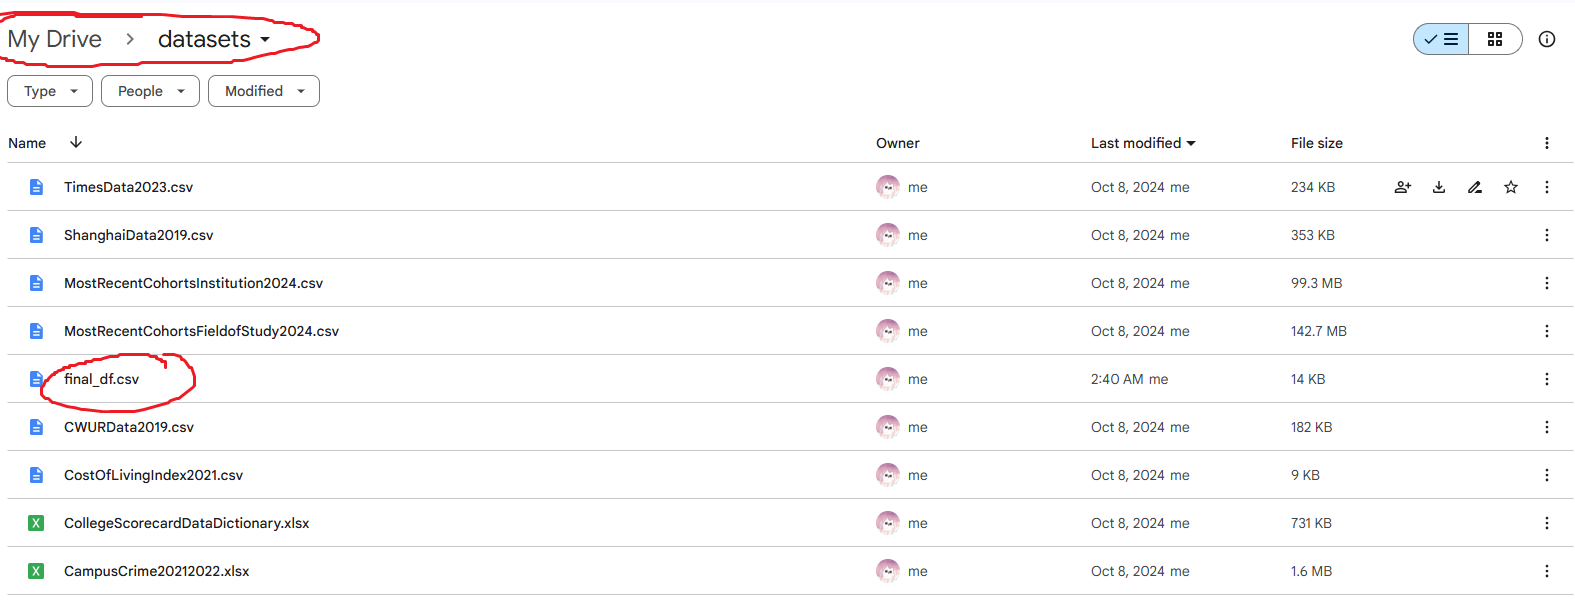